In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"
b=0.3
w=0.7
a=torch.arange(0,50,0.2,dtype=float)
len=int(a.numel()*.7)
xtr=a[:len]
ytr=b+w*xtr
xte=a[len:]
yte=b+w*xte
print(ytr.numel())

175


In [11]:
class model(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,
                                          requires_grad =True,
                                          dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,
                                          requires_grad =True,
                                          dtype=torch.float))
  def forward(self,x:torch.Tensor) -> torch.Tensor:
      return self.weights*x + self.bias



In [12]:
m = model()
l=nn.L1Loss()

p=torch.optim.SGD(params=m.parameters(),
                  lr=0.01)


epoch=0 , train loss=2.7742783379725053 , test loss=17.12115078686033
epoch=10 , train loss=2.805164981416294 , test loss=17.187314394606524
epoch=20 , train loss=2.827714353476252 , test loss=17.238609211989242
epoch=30 , train loss=2.8502637255362107 , test loss=17.28990695594379
epoch=40 , train loss=2.8728130975961688 , test loss=17.341204707347778
epoch=50 , train loss=2.8953624696561278 , test loss=17.39250582405499
epoch=60 , train loss=2.917911841716086 , test loss=17.443810104812894
epoch=70 , train loss=2.9404612137760444 , test loss=17.495114385570798
epoch=80 , train loss=2.8249697973217285 , test loss=17.209917627150674
epoch=90 , train loss=2.847519169381687 , test loss=17.261215378554663
epoch=100 , train loss=2.870068541441645 , test loss=17.312513129958653
epoch=110 , train loss=2.8926179135016032 , test loss=17.363811087097442
epoch=120 , train loss=2.911794859828268 , test loss=17.40314219244889
epoch=130 , train loss=2.9258936203139174 , test loss=17.4344911808627
e

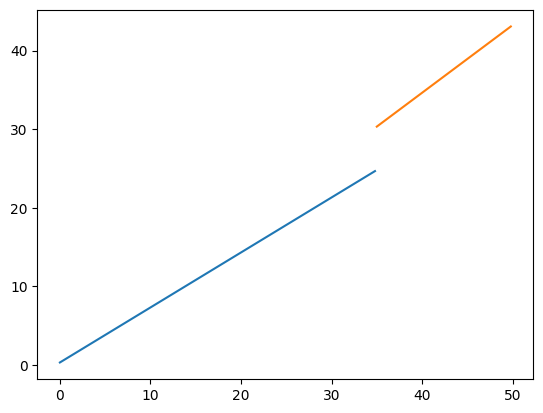

In [17]:
trainloss=[]
testloss=[]
epochcount=[]

epochs=200
for epoch in range(epochs):
  m.train()
  y=m(xtr)
  loss=l(y,ytr)
  p.zero_grad()
  loss.backward()
  p.step()
  m.eval()
  with torch.inference_mode():
    ytp=m(xte)
    ytl=l(ytp,ytr.type(torch.float).unsqueeze(dim=1))
    if epoch%10==0:
      epochcount.append(epoch)
      trainloss.append(loss.detach().numpy())
      testloss.append(ytl.detach().numpy())
      print(f"epoch={epoch} , train loss={loss} , test loss={ytl}")

print(m.state_dict())

plt.plot(xtr.detach().numpy(),ytr.detach().numpy())

plt.plot(xte.detach().numpy(),ytp.detach().numpy())


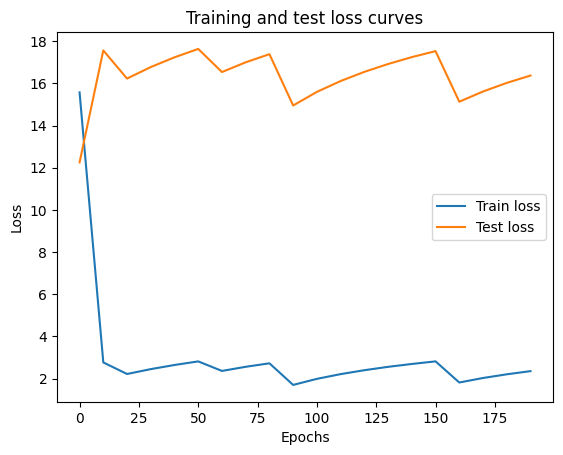

In [14]:
plt.plot(epochcount, trainloss, label="Train loss")
plt.plot(epochcount, testloss, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();